Множественная линейная регрессия с помощью Python и Scikit-learn

In [546]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

In [547]:
df = pd.read_csv('/Users/tatianasalamatova/chemoinformatics/02/delaney-processed.csv')
df.head()

,Compound ID,ESOL predicted log solubility in mols per litre,Minimum Degree,Molecular Weight,Number of H-Bond Donors,Number of Rings,Number of Rotatable Bonds,Polar Surface Area,measured log solubility in mols per litre,smiles
0,Amigdalin,-0.974,1,457.432,7,3,7,202.32,-0.77,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...
1,Fenfuram,-2.885,1,201.225,1,2,2,42.24,-3.30,Cc1occc1C(=O)Nc2ccccc2
2,citral,-2.579,1,152.237,0,0,4,17.07,-2.06,CC(C)=CCCC(C)=CC(=O)
3,Picene,-6.618,2,278.354,0,5,0,0.00,-7.87,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43
4,Thiophene,-2.232,2,84.143,0,1,0,0.00,-1.33,c1ccsc1


In [548]:
# Исследование данных на наличие нулевых значений
print(df.isnull().sum())

Compound ID                                        0
ESOL predicted log solubility in mols per litre    0
Minimum Degree                                     0
Molecular Weight                                   0
Number of H-Bond Donors                            0
Number of Rings                                    0
Number of Rotatable Bonds                          0
Polar Surface Area                                 0
measured log solubility in mols per litre          0
smiles                                             0
dtype: int64


In [549]:
# Разведочный анализ данных
# посчитаем коэффициент корреляции для всего датафрейма и округлим значения до 2 знаков после дес.точки
corr_matrix = df.iloc[:, 2:9].corr().round(2)
print(corr_matrix)# .iloc[:, 6:8])

                                           Minimum Degree  Molecular Weight  \
Minimum Degree                                       1.00             -0.10   
Molecular Weight                                    -0.10              1.00   
Number of H-Bond Donors                             -0.13              0.25   
Number of Rings                                      0.25              0.65   
Number of Rotatable Bonds                           -0.18              0.40   
Polar Surface Area                                  -0.19              0.48   
measured log solubility in mols per litre           -0.13             -0.64   

                                           Number of H-Bond Donors  \
Minimum Degree                                               -0.13   
Molecular Weight                                              0.25   
Number of H-Bond Donors                                       1.00   
Number of Rings                                               0.21   
Number of Rotatab

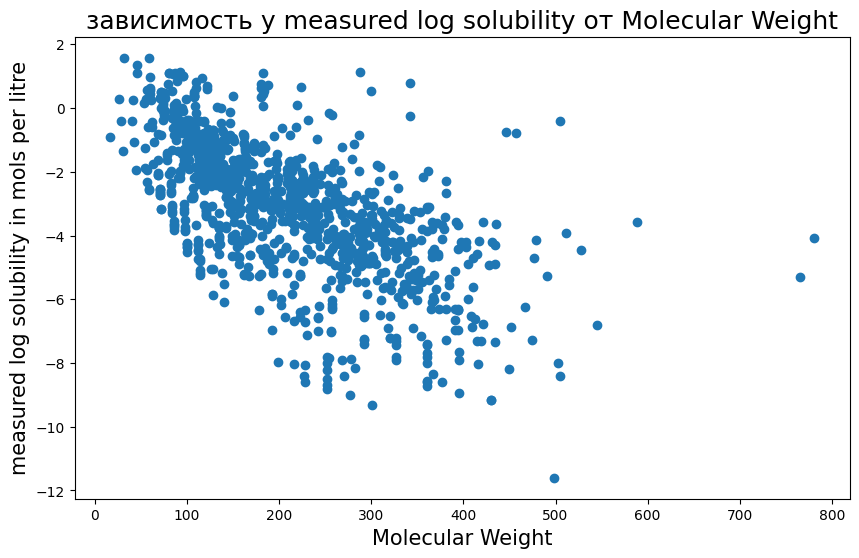

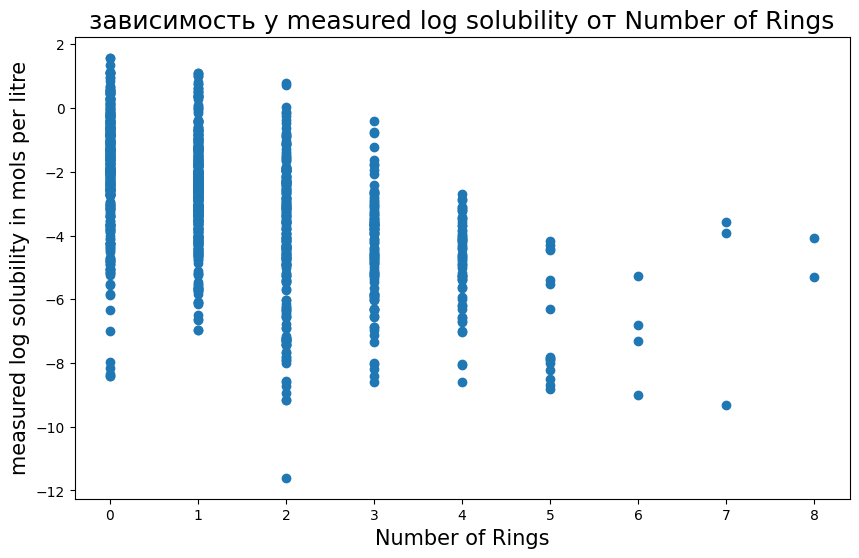

In [550]:
# подготовим данные для графического анализа (поместим столбцы датафрейма в переменные)
x1 = df['Molecular Weight']
x2 = df['Number of Rings']
y = df['measured log solubility in mols per litre']

# зададим размер окна и построим первый график
plt.figure(figsize=(10, 6))
plt.scatter(x1, y)

# добавим подписи
plt.xlabel('Molecular Weight', fontsize=15)
plt.ylabel('measured log solubility in mols per litre', fontsize=15)
plt.title('зависимость y measured log solubility от Molecular Weight', fontsize=18)
plt.show()

# зададим размер окна и построим второй график
plt.figure(figsize=(10, 6))
plt.scatter(x2, y)

# добавим подписи
plt.xlabel('Number of Rings', fontsize=15)
plt.ylabel('measured log solubility in mols per litre', fontsize=15)
plt.title('зависимость y measured log solubility от Number of Rings', fontsize=18)
plt.show()

In [551]:
X = df[['Number of Rings', 'Molecular Weight']]
y = df[['measured log solubility in mols per litre']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(789, 2) (789, 1)
(339, 2) (339, 1)


In [552]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Посчитаем среднеквадратическую ошибку и коэффициент детерминации R2 - показывает, какая доля изменчивости целевой переменной объясняется с помощью модели.

In [553]:
print('Root Mean Squared Error (RMSE):', root_mean_squared_error(y_test, y_pred))
print('R2:', round(r2_score(y_test, y_pred), 2))
print('coef', model.coef_)

Root Mean Squared Error (RMSE): 1.5702818767794333
R2: 0.46
coef [[-0.17309327 -0.01120805]]


Измените код таким образом, чтобы рассчитать коэффициенты множественной линейной регрессии с учетом всех признаков, имеющихся в датасете. 
Как изменятся метрики качества оценки модели?

In [554]:
X = df[['Minimum Degree','Number of Rings', 'Molecular Weight', 'Number of H-Bond Donors', 'Number of Rotatable Bonds', 'Polar Surface Area']]
y = df[['measured log solubility in mols per litre']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [555]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [556]:
print('Root Mean Squared Error (RMSE):', root_mean_squared_error(y_test, y_pred))
print('R2:', round(r2_score(y_test, y_pred), 2))
print('coef', model.coef_)

Root Mean Squared Error (RMSE): 1.1751296402332188
R2: 0.7
coef [[-0.06249867 -0.44889472 -0.01316619  0.11103336 -0.1581935   0.03217809]]


Как видно множественная линейная регрессия не очень хорошо приближает данные. Попробуйте улучшить качество модели используя полиномиальную регрессию.

In [557]:
poly_reg = PolynomialFeatures(degree=2)

X_poly_train = poly_reg.fit_transform(X_train)
X_poly_test = poly_reg.fit_transform(X_test)
lin_reg_poly = LinearRegression()
lin_reg_poly.fit(X_poly_train, y_train)

# Предсказания
y_pred = lin_reg_poly.predict(X_poly_test)

print('Root Mean Squared Error (RMSE):', root_mean_squared_error(y_test, y_pred))
print('R2:', round(r2_score(y_test, y_pred), 2))

Root Mean Squared Error (RMSE): 1.0348415354610871
R2: 0.77


Логистическая регрессия.

In [562]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

In [563]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np

# Загрузка данных
dataset = load_breast_cancer()
data = pd.DataFrame(dataset['data'], columns=dataset['feature_names'])
data['cancer'] = dataset['target']

# Разделение данных на обучающую и тестовую выборки
X = data.drop('cancer', axis=1)
y = data['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2020, stratify=y)

# Масштабирование данных
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Обучение модели
log_reg = LogisticRegression(max_iter=100) 
log_reg.fit(X_train_scaled, y_train)

# Предсказания
y_pred = log_reg.predict(X_test_scaled)

In [564]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9719298245614035


создайте визуализацию результата работы логистической регрессии осуществив построение графика в осях наиболее важных признаков, влияющих на классификацию дата сета. 
Как вы помните по результатам работы с методом классификации Random Forest наиболее важными признаками были: 'worst perimeter', 'worst area', 'worst radius', 'worst concave points'. 
Обозначьте разными цветами случаи наличия злокачественных изменений и случаи их отсутствия.

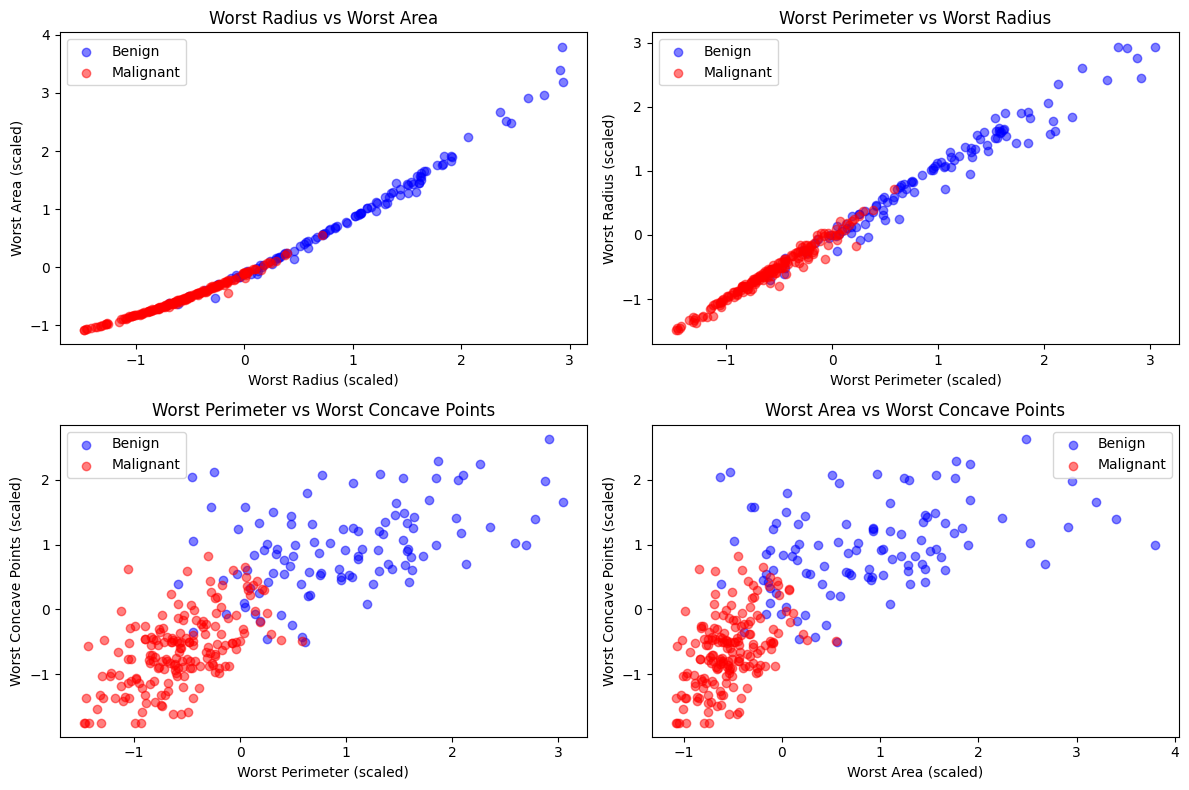

In [561]:
# Разделение данных на обучающую и тестовую выборки
X = data[['worst perimeter', 'worst area', 'worst radius', 'worst concave points']]
y = data['cancer']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=2020, stratify=y)

# Масштабирование данных
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# Обучение модели
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_scaled, y_train)

# Визуализация
plt.figure(figsize=(12, 8))

# Плоскость для 'worst radius' и 'worst area'
plt.subplot(2, 2, 1)
plt.scatter(X_test_scaled[y_test == 0][:, 2], X_test_scaled[y_test == 0][:, 1], color='blue', label='Benign', alpha=0.5)
plt.scatter(X_test_scaled[y_test == 1][:, 2], X_test_scaled[y_test == 1][:, 1], color='red', label='Malignant', alpha=0.5)
plt.title('Worst Radius vs Worst Area')
plt.xlabel('Worst Radius (scaled)')
plt.ylabel('Worst Area (scaled)')
plt.legend()

# Плоскость для 'worst perimeter' и 'worst radius'
plt.subplot(2, 2, 2)
plt.scatter(X_test_scaled[y_test == 0][:, 0], X_test_scaled[y_test == 0][:, 2], color='blue', label='Benign', alpha=0.5)
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 2], color='red', label='Malignant', alpha=0.5)
plt.title('Worst Perimeter vs Worst Radius')
plt.xlabel('Worst Perimeter (scaled)')
plt.ylabel('Worst Radius (scaled)')
plt.legend()

# Плоскость для 'worst perimeter' и 'worst concave points'
plt.subplot(2, 2, 3)
plt.scatter(X_test_scaled[y_test == 0][:, 0], X_test_scaled[y_test == 0][:, 3], color='blue', label='Benign', alpha=0.5)
plt.scatter(X_test_scaled[y_test == 1][:, 0], X_test_scaled[y_test == 1][:, 3], color='red', label='Malignant', alpha=0.5)
plt.title('Worst Perimeter vs Worst Concave Points')
plt.xlabel('Worst Perimeter (scaled)')
plt.ylabel('Worst Concave Points (scaled)')
plt.legend()

# Плоскость для 'worst area' и 'worst concave points'
plt.subplot(2, 2, 4)
plt.scatter(X_test_scaled[y_test == 0][:, 1], X_test_scaled[y_test == 0][:, 3], color='blue', label='Benign', alpha=0.5)
plt.scatter(X_test_scaled[y_test == 1][:, 1], X_test_scaled[y_test == 1][:, 3], color='red', label='Malignant', alpha=0.5)
plt.title('Worst Area vs Worst Concave Points')
plt.xlabel('Worst Area (scaled)')
plt.ylabel('Worst Concave Points (scaled)')
plt.legend()

plt.tight_layout()
plt.show()


1) График 'Worst Radius' vs 'Worst Area': Этот график показывает, как размер опухоли (радиус) соотносится с ее площадью. Если точки, представляющие злокачественные опухоли, располагаются в верхней части графика, это может указывать на то, что более крупные опухоли имеют тенденцию быть злокачественными.
2) График 'Worst Perimeter' vs 'Worst Radius': Здесь мы можем увидеть, как периметр опухоли соотносится с ее радиусом. Если злокачественные опухоли имеют больший периметр при аналогичном радиусе, это может указывать на более сложные формы опухолей.
3) График 'Worst Perimeter' vs 'Worst Concave Points': Этот график позволяет оценить, как форма опухоли (вогнутые точки) соотносится с ее периметром. Увеличение количества вогнутых точек при увеличении периметра может указывать на более агрессивные опухоли.
4) График 'Worst Area' vs 'Worst Concave Points': Этот график показывает, как площадь опухоли соотносится с количеством вогнутых точек. Если злокачественные опухоли имеют больше вогнутых точек при аналогичной площади, это может быть признаком их агрессивности.